# Machine Learning Basics

###### Luca Campana

### 0. Introduction

#### Machine Learning with scikit-learn

![scikit-learn](./static/scikit-learn-logo.png)

Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

##### A world of possibilities... 

![scikit-learn](./static/cheatsheet-scikit-learn.png)

##### Main objectives of this workshop 

* Provide you with the basic skills to machine learning tasks such as:
    - Supervised Algotithms
    - Linear Regression Model
    - Data Preparation

### 1. Remote Data Access

#### Pandas DataReader

Functions from pandas.io.data and pandas.io.ga extract data from various Internet sources into a DataFrame. In pandas 0.17.0, the sub-package pandas.io.data will be removed in favor of a separately installable pandas-datareader package. This will allow the data modules to be independently updated to your pandas installation.
See the pandas-datareader documentation for more details: http://pandas-datareader.readthedocs.org/

In [1]:
# Data Analysis
import numpy as np
import pandas as pd

# Remote Data Access
from pandas_datareader import data, wb

In [2]:
stocks = ['AAPL', 'GOOG', 'YHOO', 'GBP=X', 'SPY', 'JPY=X', 'EUR=X']

wp = data.YahooDailyReader(stocks, '2016-01-01', '2016-08-31').read()
wp

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 174 (major_axis) x 7 (minor_axis)
Items axis: Open to Adj Close
Major_axis axis: 2016-01-01 00:00:00 to 2016-08-31 00:00:00
Minor_axis axis: AAPL to YHOO

#### Panel Data

![3d_array](./static/3d_array.png)

The term panel data is derived from econometrics and is partially responsible for the name pandas: pan(el)-da(ta)-s. The names for the 3 axes are intended to give some semantic meaning to describing operations involving panel data and, in particular, econometric analysis of panel data. However, for the strict purposes of slicing and dicing a collection of DataFrame objects, you may find the axis names slightly arbitrary:

- items: axis 0, each item corresponds to a DataFrame contained inside
- major_axis: axis 1, it is the index (rows) of each of the DataFrames
- minor_axis: axis 2, it is the columns of each of the DataFrames

In [3]:
wp.to_frame().head(10)

Open        High         Low       Close       Volume  \
Date       minor                                                                
2016-01-01 EUR=X    0.920890    0.920890    0.920220    0.920890          0.0   
           GBP=X    0.678500    0.678500    0.678500    0.678500          0.0   
           JPY=X  120.288000  120.288000  120.288000  120.288000          0.0   
2016-01-04 AAPL   102.610001  105.370003  102.000000  105.349998   67649400.0   
           EUR=X    0.921230    0.925412    0.913576    0.921320          0.0   
           GBP=X    0.678430    0.680670    0.674900    0.678560          0.0   
           GOOG   743.000000  744.059998  731.257996  741.840027    3272800.0   
           JPY=X  120.317000  120.448000  118.720000  120.311000          0.0   
           SPY    200.490005  201.029999  198.589996  201.020004  222353500.0   
           YHOO    32.119999   32.349998   31.139999   31.400000   25194400.0   

                   Adj Close  
Date       minor              
2016-01-01 EUR=X    0.920890  
           GBP=X    0.678500  
           JPY=X  120.288000  
2016-01-04 AAPL   103.586180  
           EUR=X    0.921320  
           GBP=X    0.678560  
           GOOG   741.840027  
           JPY=X  120.311000  
           SPY    197.953941  
           YHOO    31.400000

In [4]:
wp.Close.head()

,AAPL,EUR=X,GBP=X,GOOG,JPY=X,SPY,YHOO
Date,,,,,,,
2016-01-01,NaN,0.92089,0.67850,NaN,120.288,NaN,NaN
2016-01-04,105.349998,0.92132,0.67856,741.840027,120.311,201.020004,31.400000
2016-01-05,102.709999,0.92357,0.67962,742.580017,119.467,201.360001,32.200001
2016-01-06,100.699997,0.93006,0.68148,743.619995,119.102,198.820007,32.160000
2016-01-07,96.449997,0.92773,0.68353,726.390015,118.610,194.050003,30.160000


In [5]:
dataset = wp.Close.ffill().dropna()
dataset.head()

,AAPL,EUR=X,GBP=X,GOOG,JPY=X,SPY,YHOO
Date,,,,,,,
2016-01-04,105.349998,0.92132,0.67856,741.840027,120.311,201.020004,31.400000
2016-01-05,102.709999,0.92357,0.67962,742.580017,119.467,201.360001,32.200001
2016-01-06,100.699997,0.93006,0.68148,743.619995,119.102,198.820007,32.160000
2016-01-07,96.449997,0.92773,0.68353,726.390015,118.610,194.050003,30.160000
2016-01-08,96.959999,0.91525,0.68367,714.469971,117.540,191.919998,30.629999


### 2. Data Visualization

In [6]:
# Plot
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [7]:
def plot_model(dataset, title='Plot', xlabel='Date', ylabel='Price'):
    # Plot outputs
    params = {
            'font.family' : 'arial',
            'font.style' : 'normal',
            'legend.fontsize': 'large',
            'figure.figsize': (15, 8),
            'axes.labelsize': 'x-large',
            'axes.titlesize':'x-large',
            'xtick.labelsize':'small',
            'ytick.labelsize':'small',
            }
    plt.rcParams.update(params)

    dataset.plot()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)

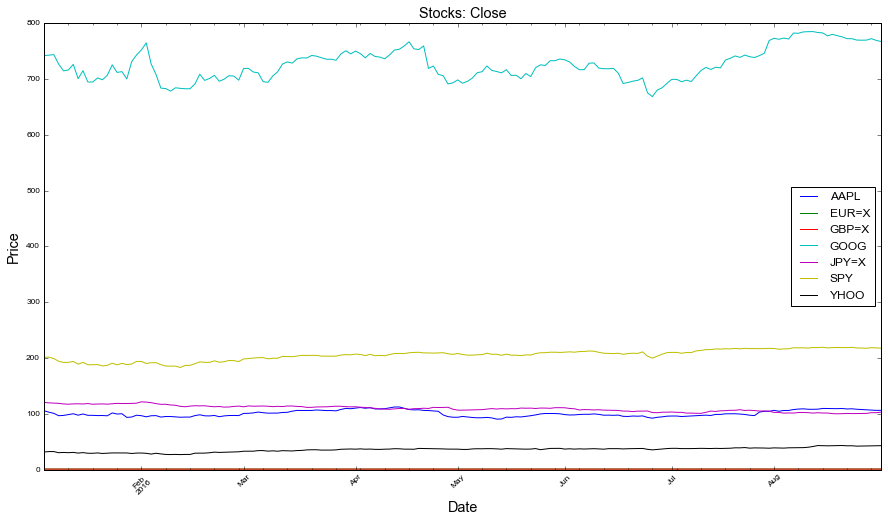

In [8]:
plot_model(dataset, 'Stocks: Close')

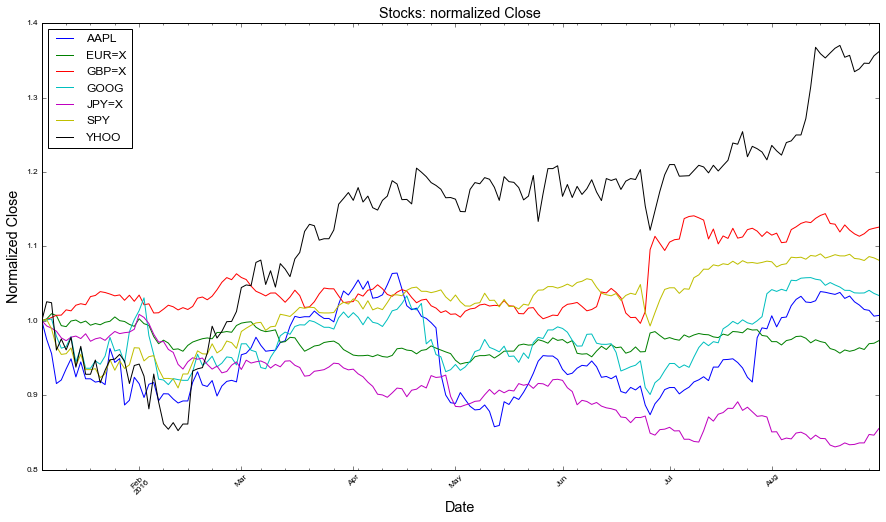

In [9]:
norm_data = dataset / dataset.iloc[0]
plot_model(norm_data, 'Stocks: normalized Close', ylabel='Normalized Close')

### 3. Machine Learning

Machine learning is a subfield of computer science that evolved from the study of pattern recognition and computational learning theory in artificial intelligence. In 1959, Arthur Samuel defined machine learning as a "Field of study that gives computers the ability to learn without being explicitly programmed". Machine learning explores the study and construction of algorithms that can learn from and make predictions on data.

Machine Learning is divided between 3 mayor categories:
- Supervised: All data is labeled and the algorithms learn to predict the output from the input data.
- Unsupervised: All data is unlabeled and the algorithms learn to inherent structure from the input data.
- Semi-supervised: Some data is labeled but most of it is unlabeled and a mixture of supervised and unsupervised techniques can be used.

#### Supervised Algorithm

Supervised learning problems can be further grouped into regression and classification problems.
- Classification: A classification problem is when the output variable is a category, such as “BUY” or “SELL”.
- Regression: A regression problem is when the output variable is a real value, such as the “Close Price”.

##### Linear Regression Model

Linear Regression is the oldest and most widely used predictive model in the field of machine learning. The goal is to  minimize the sum of the squared errros to fit a straight line to a set of data points.


The linear regression model fits a linear function to a set of data points. The form of the function is:

Y = β0 + β1*X1 + β2*X2 + … + βn*Xn


Where Y is the target variable,  and X1, X2, ... Xn are the predictor variables and  β1, β2, … βn are the coefficients that multiply the predictor variables.  β0 is constant.

In [10]:
from sklearn import linear_model

In [11]:
# define the target
target = 'GOOG'

# prepare the target dataset
dataset_target = dataset.copy()
dataset_target[target] = dataset_target[target].shift(-1)
dataset_target = dataset_target.dropna()

# define the percentage of training dataset ex. 60%
train_ix = len(dataset_target)*60//100

## Split the data into training set
dataset_X_train = dataset_target[:train_ix].drop(target, axis=1)
dataset_y_train = dataset_target[:train_ix][target].to_frame()

In [12]:
## Create linear regression object
regr = linear_model.LinearRegression()

## Train the model using the training sets
regr.fit(dataset_X_train, dataset_y_train)
    
# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean square error
print("Residual sum of squares: %.2f"
        % np.mean((regr.predict(dataset_X_train) - dataset_y_train) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' 
        % regr.score(dataset_X_train, dataset_y_train))

Coefficients: 
 [[   1.40586991 -279.0116392   530.31921703    3.87957694    1.32437312
     1.34569519]]
Residual sum of squares: 190.61
Variance score: 0.59


In [13]:
## Split the targets into test set
dataset_X_test = dataset_target[train_ix:].drop(target, axis=1)
dataset_y_test = dataset_target[train_ix:][target].to_frame()

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(dataset_X_test) - dataset_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' 
      % regr.score(dataset_X_test, dataset_y_test))

Coefficients: 
 [[   1.40586991 -279.0116392   530.31921703    3.87957694    1.32437312
     1.34569519]]
Residual sum of squares: 294.32
Variance score: 0.73


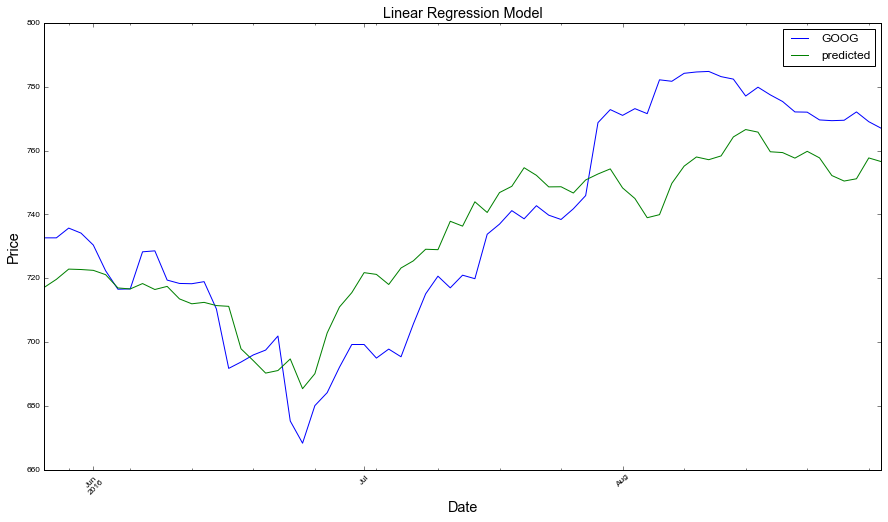

In [14]:
results = dataset_y_test
results['predicted'] = regr.predict(dataset_X_test)

# Plot outputs
plot_model(results[[target, 'predicted']], 'Linear Regression Model')

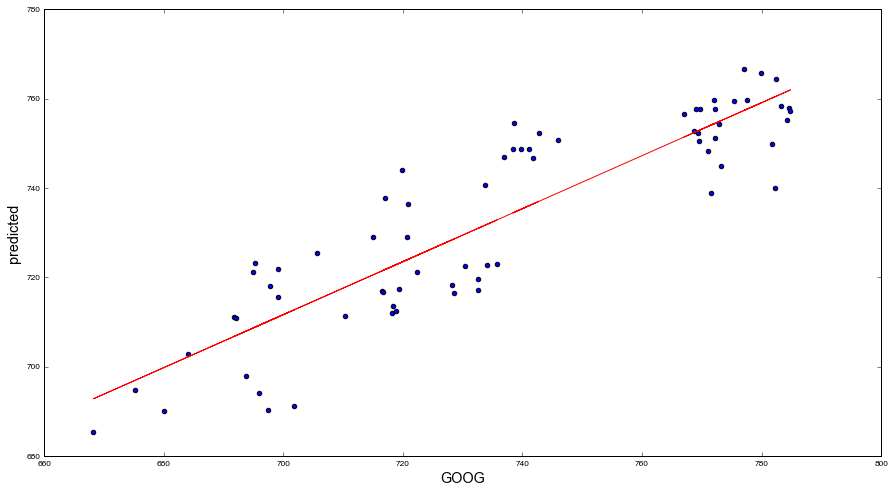

In [15]:
# Scatter Plot
fit = np.polyfit(results[target], results['predicted'], deg=1)
results.plot(kind='scatter', x=target, y='predicted')
plt.plot(results[target], fit[0] * results[target] + fit[1], color='red')
plt.show()

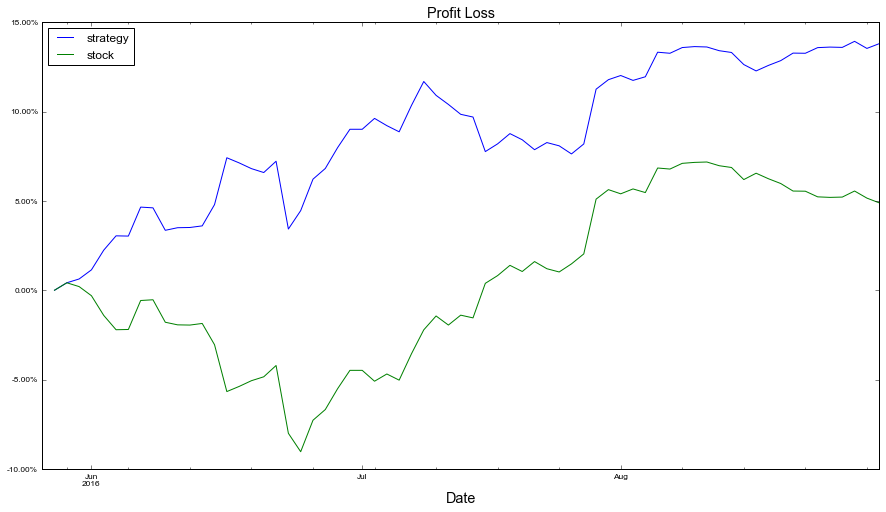

In [16]:
# LONG & SHORT simulation based on the prediction
results['long'] = results['predicted'].gt(results['predicted'].shift(1))
results['equity'] = results[target].pct_change()
results.loc[results['long'] != True, 'equity'] = results['equity'] * -1
results['strategy'] = results['equity'].cumsum()
results['stock'] = results[target].pct_change().cumsum()

# Profit Loss Plot
ax = results[['strategy', 'stock']].plot(title='Profit Loss')
fmt = '{x:.2%}'                                         # https://pyformat.info/
yticks = mtick.StrMethodFormatter(fmt) # Use the new-style format string
ax.yaxis.set_major_formatter(yticks)
plt.show()

In [17]:
# define the target
target = 'GOOG'

# returns dataset
returns = dataset.loc[:, dataset.columns != target].pct_change().fillna(0)
returns = returns.join(dataset[[target]])

# prepare the target dataset
returns[target] = returns[target].shift(-1)
returns = returns.dropna()

In [18]:
dataset.head()

,AAPL,EUR=X,GBP=X,GOOG,JPY=X,SPY,YHOO
Date,,,,,,,
2016-01-04,105.349998,0.92132,0.67856,741.840027,120.311,201.020004,31.400000
2016-01-05,102.709999,0.92357,0.67962,742.580017,119.467,201.360001,32.200001
2016-01-06,100.699997,0.93006,0.68148,743.619995,119.102,198.820007,32.160000
2016-01-07,96.449997,0.92773,0.68353,726.390015,118.610,194.050003,30.160000
2016-01-08,96.959999,0.91525,0.68367,714.469971,117.540,191.919998,30.629999


In [19]:
returns.head()

,AAPL,EUR=X,GBP=X,JPY=X,SPY,YHOO,GOOG
Date,,,,,,,
2016-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,742.580017
2016-01-05,-0.025059,0.002442,0.001562,-0.007015,0.001691,0.025478,743.619995
2016-01-06,-0.019570,0.007027,0.002737,-0.003055,-0.012614,-0.001242,726.390015
2016-01-07,-0.042205,-0.002505,0.003008,-0.004131,-0.023992,-0.062189,714.469971
2016-01-08,0.005288,-0.013452,0.000205,-0.009021,-0.010977,0.015584,716.030029


Coefficients: 
 [[ -40.03739574  262.86043046 -218.64197984  406.21145471  308.31531903
    22.09884791]]
Residual sum of squares: 444.27
Variance score: 0.05
Coefficients: 
 [[ -40.03739574  262.86043046 -218.64197984  406.21145471  308.31531903
    22.09884791]]
Residual sum of squares: 1398.65
Variance score: -0.28


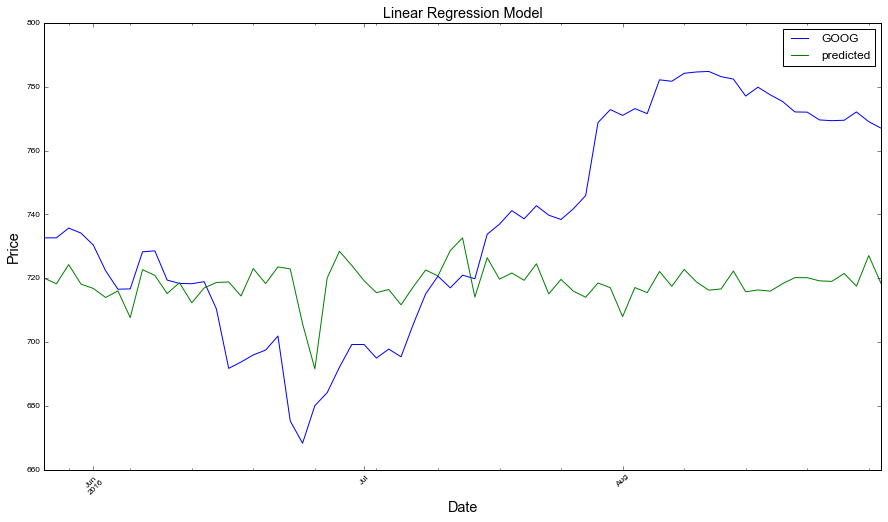

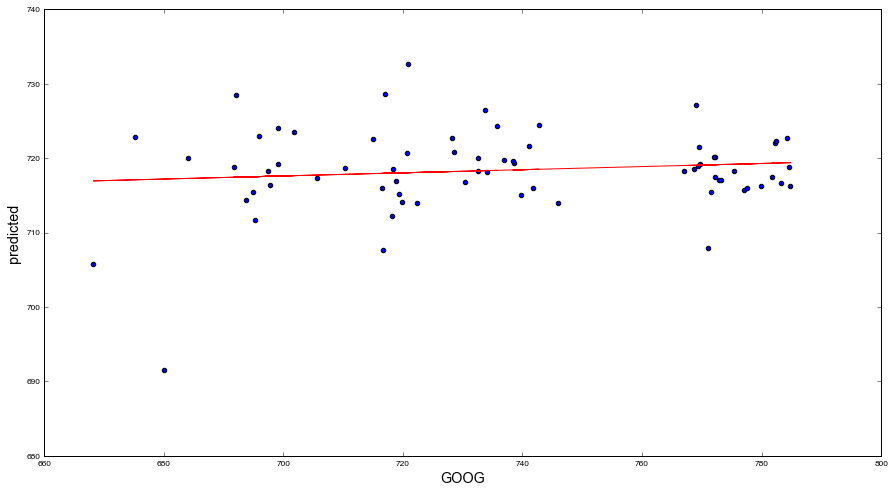

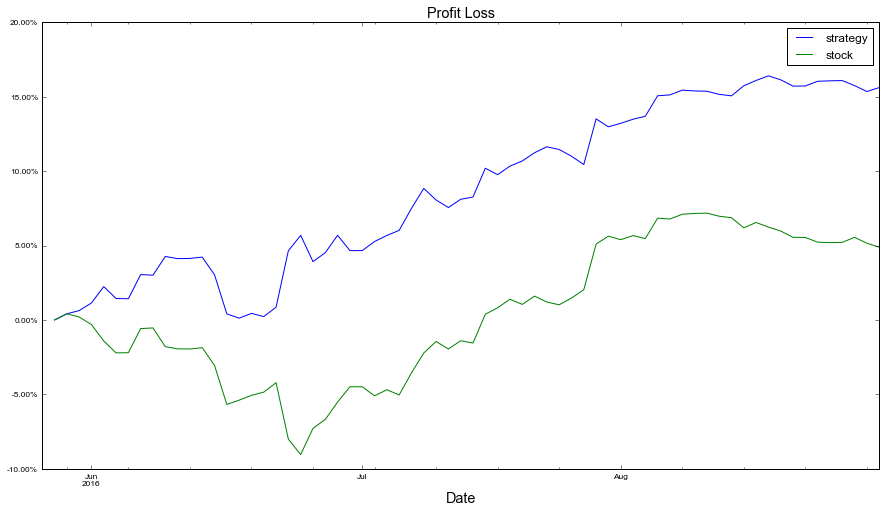

In [20]:
# define the percentage of training dataset ex. 60%
train_ix = len(returns)*60//100

## Split the data into training set
dataset_X_train = returns[:train_ix].drop(target, axis=1)
dataset_y_train = returns[:train_ix][target].to_frame()

## Create linear regression object
regr = linear_model.LinearRegression()

## Train the model using the training sets
regr.fit(dataset_X_train, dataset_y_train)
    
# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean square error
print("Residual sum of squares: %.2f"
        % np.mean((regr.predict(dataset_X_train) - dataset_y_train) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' 
        % regr.score(dataset_X_train, dataset_y_train))

## Split the targets into test set
dataset_X_test = returns[train_ix:].drop(target, axis=1)
dataset_y_test = returns[train_ix:][target].to_frame()

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(dataset_X_test) - dataset_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' 
      % regr.score(dataset_X_test, dataset_y_test))

results = dataset_y_test
results['predicted'] = regr.predict(dataset_X_test)

# Plot outputs
plot_model(results[[target, 'predicted']], 'Linear Regression Model')

# Scatter Plot
fit = np.polyfit(results[target], results['predicted'], deg=1)
results.plot(kind='scatter', x=target, y='predicted')
plt.plot(results[target], fit[0] * results[target] + fit[1], color='red')
plt.show()

# LONG & SHORT simulation based on the prediction
results['long'] = results['predicted'].gt(results['predicted'].shift(1))
results['equity'] = results[target].pct_change()
results.loc[results['long'] != True, 'equity'] = results['equity'] * -1
results['strategy'] = results['equity'].cumsum()
results['stock'] = results[target].pct_change().cumsum()

# Profit Loss Plot
ax = results[['strategy', 'stock']].plot(title='Profit Loss')
fmt = '{x:.2%}'                                         # https://pyformat.info/
yticks = mtick.StrMethodFormatter(fmt) # Use the new-style format string
ax.yaxis.set_major_formatter(yticks)
plt.show()

TODO List:
* Compare the 2 strategies: Price & Returns
* Make a Function to automatise the ML

# Thanks for your attention! 

## Any Questions?

In [21]:
# Notebook style
from IPython.core.display import HTML
css_file = './static/style.css'
HTML(open(css_file, "r").read())